### ED Figure 4

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
uas_total  = xr.open_dataset('uas_total_esm-hist-ssp585.nc').uas
vas_total  = xr.open_dataset('vas_total_esm-hist-ssp585.nc').vas
qnet_total = xr.open_dataset('qnet_total_esm-hist-ssp585.nc').qnet
fw_total   = xr.open_dataset('fw_total_esm-hist-ssp585.nc').fw

F1 = [uas_total,vas_total,qnet_total,fw_total]

In [3]:
uas_mw  = xr.open_dataset('uas_mw_esm-hist-ssp585.nc').uas
vas_mw  = xr.open_dataset('vas_mw_esm-hist-ssp585.nc').vas
qnet_mw = xr.open_dataset('qnet_mw_esm-hist-ssp585.nc').qnet
fw_mw   = xr.open_dataset('fw_mw_esm-hist-ssp585.nc').fw

F2 = [uas_mw,vas_mw,qnet_mw,fw_mw]

In [4]:
YY1,YY2 = 2041,2050
YY3,YY4 = 2001,2010
uas_ym_mw  = uas2_adj.sel(year=slice(YY1,YY2)).mean('year')
vas_ym_mw  = vas2_adj.sel(year=slice(YY1,YY2)).mean('year')
qnet_ym_mw = qnet2_adj.sel(year=slice(YY1,YY2)).mean('year')
fw_ym_mw   = fw2_adj.sel(year=slice(YY1,YY2)).mean('year')

F4 = [uas_ym_mw,vas_ym_mw,qnet_ym_mw,fw_ym_mw]

In [5]:
uas_ym_cc  = calc_var_cc(uas[0,:,:])
vas_ym_cc  = calc_var_cc(vas[0,:,:])
qnet_ym_cc = calc_var_cc(qnet[0,:,:])
fw_ym_cc   = calc_var_cc(fw[0,:,:])

F3 = [uas_ym_cc,vas_ym_cc,qnet_ym_cc,fw_ym_cc]

#### Plot

In [6]:
LABELS = ['Zonal Wind Velocity'     ,'Zonal Wind Velocity [Meltwater Feedback]'     ,'',\
          'Meridional Wind Velocity','Meridional Wind Velocity [Meltwater Feedback]','',\
          'Net Air$-$Sea Heat Flux' ,'Net Air$-$Sea Heat Flux [Meltwater Feedback]' ,'',\
          'Net Freshwater Flux'     ,'Net FW Flux [Meltwater Feedback + Added MW]'     ,'']
LEGENDS = ['Anomaly [Hist+SSP5-8.5]','Anomaly [MW Feedback]']

In [7]:
def make_plot8(F1,F2,F3,F4):
    ''''''
    ncol,nrow = 2+1,4
    hi,hj = 5.5,3
    
    XX = [2001,2050]
    YY = [-75-2,-35+2]
    PRS = [1.325+0.15,-1.5]
    
    colors_line = ['darkorange','royalblue']
    styles_line = ['-','-']
    lw = 2
    fs_1,fs_2,fs_3,fs_4,fs_5,fs_6 = 13,11.5,11,10.5,10,9
    ''''''
    fig = plt.figure(1,figsize=(hi*2+1.5,hj*nrow))
    gs = gridspec.GridSpec(ncols=ncol,nrows=nrow,wspace=0.05,hspace=0.35,
                           width_ratios=[hi,hi,1.5],height_ratios=np.ones((nrow)))
    st = fig.suptitle('',fontsize=fs_1,y=0.935)
    
    kk=0
    for ii in np.arange(nrow):
        for jj in np.arange(ncol):
            ax = plt.subplot(gs[kk])
            if kk==0:
                p1 = plt.contourf(year,lat,F1[ii].T,levels=levs_uas,cmap=colormap_uas,extend='both',zorder=0)
            elif kk==1:
                q1 = plt.contourf(year,lat,F2[ii].T,levels=levs_uas*cc_a,cmap=colormap_uas,extend='both',zorder=0)
            elif kk==3:
                p2 = plt.contourf(year,lat,F1[ii].T,levels=levs_vas,cmap=colormap_vas,extend='both',zorder=0)
            elif kk==4:
                q2 = plt.contourf(year,lat,F2[ii].T,levels=levs_vas*cc_a,cmap=colormap_vas,extend='both',zorder=0)
            elif kk==6:
                p3 = plt.contourf(year,lat,F1[ii].T,levels=levs_qnet,cmap=colormap_qnet,extend='both',zorder=0)
            elif kk==7:
                q3 = plt.contourf(year,lat,F2[ii].T,levels=levs_qnet*cc_a,cmap=colormap_qnet,extend='both',zorder=0)
            elif kk==9:
                p4 = plt.contourf(year,lat_ocn,F1[ii].T,levels=levs_fw,cmap=colormap_fw,extend='both',zorder=0)
            elif kk==10:
                q4 = plt.contourf(year,lat_ocn,F2[ii].T,levels=levs_fw*cc_a,cmap=colormap_fw,extend='both',zorder=0)
            elif kk==2:
                c1 = plt.plot(F3[0],lat,linestyle=styles_line[0],color=colors_line[0],linewidth=lw,zorder=0,label=LEGENDS[0])
                f1 = plt.plot(F4[0],lat,linestyle=styles_line[1],color=colors_line[1],linewidth=lw,zorder=1,label=LEGENDS[1])
                ax.set_xlim([-0.4,0.4])
                ax.set_xticks(np.arange(-0.4,0.4+0.1,0.4))
                ax.set_xticks(np.arange(-0.4,0.4+0.1,0.1),minor=True)
                ax.set_xticklabels(['-0.4'.replace('-', '\N{MINUS SIGN}'),'0','0.4'],rotation=0)
            elif kk==5:
                c2 = plt.plot(F3[1],lat,linestyle=styles_line[0],color=colors_line[0],linewidth=lw,zorder=0,label=LEGENDS[0])
                f2 = plt.plot(F4[1],lat,linestyle=styles_line[1],color=colors_line[1],linewidth=lw,zorder=1,label=LEGENDS[1])
                ax.set_xlim([-0.15,0.15])
                ax.set_xticks(np.arange(-0.15,0.15+0.01,0.15))
                ax.set_xticks(np.arange(-0.15,0.15+0.01,0.05),minor=True)
                ax.set_xticklabels(['-0.15'.replace('-', '\N{MINUS SIGN}'),'0','0.15'],rotation=0)
            elif kk==8:
                c3 = plt.plot(F3[2],lat,linestyle=styles_line[0],color=colors_line[0],linewidth=lw,zorder=0,label=LEGENDS[0])
                f3 = plt.plot(F4[2],lat,linestyle=styles_line[1],color=colors_line[1],linewidth=lw,zorder=1,label=LEGENDS[1])
                ax.set_xlim([-2,6])
                ax.set_xticks(range(-2,6+1,2))
                ax.set_xticks(range(-2,6+1,1),minor=True)
            elif kk==11:
                c4 = plt.plot(F3[3],lat_ocn,linestyle=styles_line[0],color=colors_line[0],linewidth=lw,zorder=0,label=LEGENDS[0])
                f4 = plt.plot(F4[3],lat_ocn,linestyle=styles_line[1],color=colors_line[1],linewidth=lw,zorder=1,label=LEGENDS[1])
                ax.set_xlim([-0.3,0.9])
                ax.set_xticks(np.arange(-0.3,0.9+0.1,0.3))
                ax.set_xticks(np.arange(-0.3,0.9+0.1,0.1),minor=True)
                ax.set_xticklabels(['-0.3'.replace('-', '\N{MINUS SIGN}'),'0','0.3','0.6','0.9'],rotation=0)
                #
                ax.annotate('MW'+'\n'+'added',xy=(0.55,-67.5),xytext=(0.55,-50),color=colors_line[1],fontsize=fs_1,\
                            xycoords='data',textcoords='data',horizontalalignment='center',verticalalignment='top',\
                            arrowprops=dict(color=colors_line[1],headlength=10,headwidth=10,width=2,shrink=0.0))       
            ###
            if kk==2:
                leg = plt.legend(loc=2,fontsize=fs_4,bbox_to_anchor=(-0.6,PRS[0]),ncol=1,\
                                 handlelength=1.5,columnspacing=1,labelspacing=0.5,handletextpad=0.5)
                plt.setp(leg.get_texts(),color='black')
                leg.get_frame().set_facecolor('none')
                leg.get_frame().set_edgecolor('black')
                leg.get_frame().set_linewidth(1.0)
            ######
            if jj<2:
                ax.set_title(labels[kk]+' '+LABELS[kk],fontsize=fs_2,loc='center',y=0.99)
                ax.set_xlim(XX)
                ax.set_xticks(x_ticks_major)
                ax.set_xticks(x_ticks_minor,minor=True)
                ax.set_xticklabels(x_ticklabels_major,rotation=0,ha='center')
            elif jj==2:
                C_PAD = [2,2,1]
                if ii==nrow-1:
                    c_pad = PRS[1]
                else:
                    c_pad = PRS[1]-C_PAD[ii]
                #
                plt.plot([0,0],[lat[0],lat[-1]],color='black',linewidth=1)
                ax.set_xlabel('['+UNITS[ii]+']',fontsize=fs_4,labelpad=c_pad)
                ax.set_title(labels[kk]+' '+LABELS[kk],fontsize=fs_2,loc='center',y=0.99)
            ###
            kk=kk+1
            
            ax.set_ylim(YY)
            ax.set_yticks(y_ticks_major)
            ax.set_yticks(y_ticks_minor,minor=True)
            if jj==0:
                ax.set_yticklabels(y_labels_major)
            else:
                ax.axes.yaxis.set_ticklabels([])
            ax.set_ylabel('',fontsize=fs_3)
            ###
            ax.tick_params(which='major',labelsize=fs_5,direction='out',length=6)
            ax.tick_params(which='minor',labelsize=fs_6,direction='out',length=4)
            ax.tick_params(axis='x',which='major',pad=2)
            ax.tick_params(axis='y',which='major',pad=1)
            
    # Plot a colorbar
    cax1 = fig.add_axes([0.04,0.730,0.012,0.149])
    cax2 = fig.add_axes([0.04,0.528,0.012,0.149])
    cax3 = fig.add_axes([0.04,0.326,0.012,0.149])
    cax4 = fig.add_axes([0.04,0.125,0.012,0.149])
    cax5 = fig.add_axes([0.93,0.730,0.012,0.149])
    cax6 = fig.add_axes([0.93,0.528,0.012,0.149])
    cax7 = fig.add_axes([0.93,0.326,0.012,0.149])
    cax8 = fig.add_axes([0.93,0.125,0.012,0.149])
    cb1 = plt.colorbar(p1,cax=cax1,orientation='vertical',ticks=levs_uas[::5])
    cb2 = plt.colorbar(p2,cax=cax2,orientation='vertical',ticks=levs_vas[::5])
    cb3 = plt.colorbar(p3,cax=cax3,orientation='vertical',ticks=levs_qnet[::5])
    cb4 = plt.colorbar(p4,cax=cax4,orientation='vertical',ticks=levs_fw[::5])
    cb5 = plt.colorbar(q1,cax=cax5,orientation='vertical',ticks=levs_uas[::5]*cc_a)
    cb6 = plt.colorbar(q2,cax=cax6,orientation='vertical',ticks=levs_vas[::5]*cc_a)
    cb7 = plt.colorbar(q3,cax=cax7,orientation='vertical',ticks=levs_qnet[::5]*cc_a)
    cb8 = plt.colorbar(q4,cax=cax8,orientation='vertical',ticks=levs_fw[::5]*cc_a)
    cb1.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb2.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb3.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb4.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb5.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb6.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb7.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb8.ax.tick_params(axis='y',labelsize=fs_5,direction='in',length=6)
    cb1.ax.set_ylabel('['+UNITS[0]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cb2.ax.set_ylabel('['+UNITS[1]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cb3.ax.set_ylabel('['+UNITS[2]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cb4.ax.set_ylabel('['+UNITS[3]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cb5.ax.set_ylabel('['+UNITS[0]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cb6.ax.set_ylabel('['+UNITS[1]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cb7.ax.set_ylabel('['+UNITS[2]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cb8.ax.set_ylabel('['+UNITS[3]+']',fontsize=fs_3,labelpad=1,rotation=90)
    cax1.yaxis.set_label_position('left')
    cax2.yaxis.set_label_position('left')
    cax3.yaxis.set_label_position('left')
    cax4.yaxis.set_label_position('left')
    cax5.yaxis.set_label_position('left')
    cax6.yaxis.set_label_position('left')
    cax7.yaxis.set_label_position('left')
    cax8.yaxis.set_label_position('left')
    cax1.yaxis.set_ticks_position('right')
    cax2.yaxis.set_ticks_position('right')
    cax3.yaxis.set_ticks_position('right')
    cax4.yaxis.set_ticks_position('right')
    cax5.yaxis.set_ticks_position('right')
    cax6.yaxis.set_ticks_position('right')
    cax7.yaxis.set_ticks_position('right')
    cax8.yaxis.set_ticks_position('right')

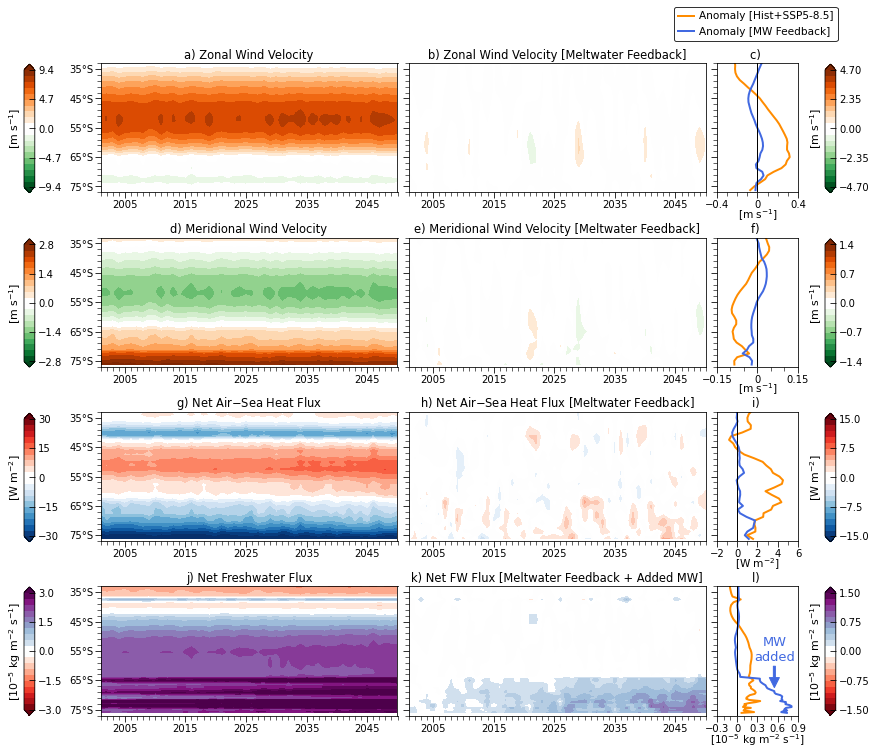

In [8]:
make_plot8(F1,F2,F3,F4)